***THREE PARTS OF ASSIGNMENT***

In [1]:
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json 


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder

import requests 
from bs4 import BeautifulSoup 

from pandas.io.json import json_normalize 

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

print("Libraries imported.")

Libraries imported.


**1. Scrap data from Wikipedia page into a DataFrame**

In [2]:
# GET request
data = requests.get('https://en.wikipedia.org/wiki/Districts_of_Barcelona').text

soup = BeautifulSoup(data, 'html.parser')

In [3]:
website_url = requests.get('https://en.wikipedia.org/wiki/Districts_of_Barcelona').text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
#print(soup.prettify())

My_table = soup.find('table',{'class':'wikitable'})

In [4]:
links = My_table.findAll('a')

In [5]:
hoods = []
for l in links:
    hoods.append(l.get('title'))
    
df = pd.DataFrame()
df['Neighborhoods'] = hoods

In [6]:
bcn = pd.DataFrame({"Neighborhood": hoods})
        
bcn.drop([0,1,6,7,14,15,26,27,31,32,39,40,46,47,59,60,74,75,83,84,95],inplace = True)
bcn

,Neighborhood
2,"La Barceloneta, Barcelona"
3,El Gòtic
4,El Raval
5,"Sant Pere, Santa Caterina i la Ribera"
8,L'Antiga Esquerra de l'Eixample
9,La Nova Esquerra de l'Eixample
10,Dreta de l'Eixample
11,Fort Pienc
12,Sagrada Família (Eixample)
13,"Sant Antoni, Barcelona"


**2. LATITUDES AND LOGITUDES**

In [7]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Barcelona, Spain'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [8]:
coords = [ get_latlng(neighborhood) for neighborhood in bcn["Neighborhood"].tolist() ]

In [9]:
len(coords)

75

In [10]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
bcn['Latitude'] = df_coords['Latitude']
bcn['Longitude'] = df_coords['Longitude']

In [11]:
bcn = bcn.dropna()

In [12]:
bcn.to_csv("bcnnnn.csv", index=False)

**3. CLUSTERING NEIGHBORHOODS**

In [13]:
# get the coordinates of Kuala Lumpur
address = 'Barcelona, Spain'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of BCN, Spain {}, {}.'.format(latitude, longitude))

The geograpical coordinate of BCN, Spain 41.3828939, 2.1774322.


In [14]:
# create map of Toronto using latitude and longitude values
map_bcn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(bcn['Latitude'], bcn['Longitude'], bcn['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_bcn)  
    
map_bcn

In [15]:
CLIENT_ID = 'AEFPWY3SNLQRSEX3FPN53S230CYMB5CGDQRPCDHTRSFHRUES' # your Foursquare ID
CLIENT_SECRET = 'WVKR2NURPRU2T2SJUVSZK3GZJAHXFUFAAN2BITFBJ5RZST3M' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AEFPWY3SNLQRSEX3FPN53S230CYMB5CGDQRPCDHTRSFHRUES
CLIENT_SECRET:WVKR2NURPRU2T2SJUVSZK3GZJAHXFUFAAN2BITFBJ5RZST3M


In [16]:
bcn.loc[2, 'Neighborhood']

'La Barceloneta, Barcelona'

In [17]:
neighborhood_latitude = bcn.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bcn.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = bcn.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of La Barceloneta, Barcelona are 41.37763000000007, 2.17145000000005.


In [18]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=AEFPWY3SNLQRSEX3FPN53S230CYMB5CGDQRPCDHTRSFHRUES&client_secret=WVKR2NURPRU2T2SJUVSZK3GZJAHXFUFAAN2BITFBJ5RZST3M&v=20180605&ll=41.37763000000007,2.17145000000005&radius=500&limit=100'

In [19]:
results = requests.get(url).json()

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

nearby_venues.head()

93 venues were returned by Foursquare.


,name,categories,lat,lng
0,Pizza Circus,Pizza Place,41.377905,2.172911
1,Filmoteca de Catalunya,Movie Theater,41.378540,2.171101
2,Frankie Gallo Cha Cha Cha,Pizza Place,41.378450,2.172683
3,Cañete,Tapas Restaurant,41.379154,2.173092
4,Pastelería La Estrella,Pie Shop,41.378141,2.173310


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# type your answer here
bcn_venues = getNearbyVenues(names=bcn['Neighborhood'],
                                   latitudes=bcn['Latitude'],
                                   longitudes=bcn['Longitude']
                                  )

In [24]:
bcn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Can Baró,18,18,18,18,18,18
Can Peguera,62,62,62,62,62,62
Canyelles (neighbourhood),37,37,37,37,37,37
Ciutat Meridiana,28,28,28,28,28,28
Dreta de l'Eixample,37,37,37,37,37,37
El Baix Guinardó,23,23,23,23,23,23
El Camp d'en Grassot i Gràcia Nova,6,6,6,6,6,6
El Carmel,11,11,11,11,11,11
El Coll,31,31,31,31,31,31


In [25]:
print('There are {} uniques categories.'.format(len(bcn_venues['Venue Category'].unique())))

There are 241 uniques categories.


In [58]:
bcn_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"La Barceloneta, Barcelona",41.37763,2.17145,Pizza Circus,41.377905,2.172911,Pizza Place
1,"La Barceloneta, Barcelona",41.37763,2.17145,Filmoteca de Catalunya,41.378540,2.171101,Movie Theater
2,"La Barceloneta, Barcelona",41.37763,2.17145,Frankie Gallo Cha Cha Cha,41.378450,2.172683,Pizza Place
3,"La Barceloneta, Barcelona",41.37763,2.17145,Cañete,41.379154,2.173092,Tapas Restaurant
4,"La Barceloneta, Barcelona",41.37763,2.17145,Pastelería La Estrella,41.378141,2.173310,Pie Shop
5,"La Barceloneta, Barcelona",41.37763,2.17145,El Pachuco,41.376369,2.169148,Mexican Restaurant
6,"La Barceloneta, Barcelona",41.37763,2.17145,Cassette Bar,41.377324,2.173629,Bar
7,"La Barceloneta, Barcelona",41.37763,2.17145,La Robadora,41.379500,2.170463,Gastropub
8,"La Barceloneta, Barcelona",41.37763,2.17145,Madame Jasmine,41.378128,2.169934,Bar
9,"La Barceloneta, Barcelona",41.37763,2.17145,Miscelanea Gallery-Shop-Café,41.377702,2.173564,Art Gallery


In [67]:
#df['Counts'] = df.groupby(['Color'])['Value'].transform('count')
uniqueValues = bcn_venues['Venue Category'].nunique()


241


In [68]:
uniquee = bcn_venues['Venue Category'].unique()
uniqueee = pd.DataFrame(data = uniquee)
uniqueee

,0
0,Pizza Place
1,Movie Theater
2,Tapas Restaurant
3,Pie Shop
4,Mexican Restaurant
5,Bar
6,Gastropub
7,Art Gallery
8,Cocktail Bar
9,Roof Deck


In [65]:
listunique = []
listje = []

for e in uniquee:
    listunique.append(e)
for e in jeje:
    listje.append(e)

TypeError: 'method' object is not iterable

In [81]:
pdd = pd.DataFrame(data= bcn_venues['Venue Category'].value_counts())
pddd = pdd.head(22)
pdd

,Venue Category
Spanish Restaurant,127
Tapas Restaurant,112
Restaurant,100
Café,97
Mediterranean Restaurant,87
Plaza,80
Hotel,76
Grocery Store,73
Bakery,65
Pizza Place,61


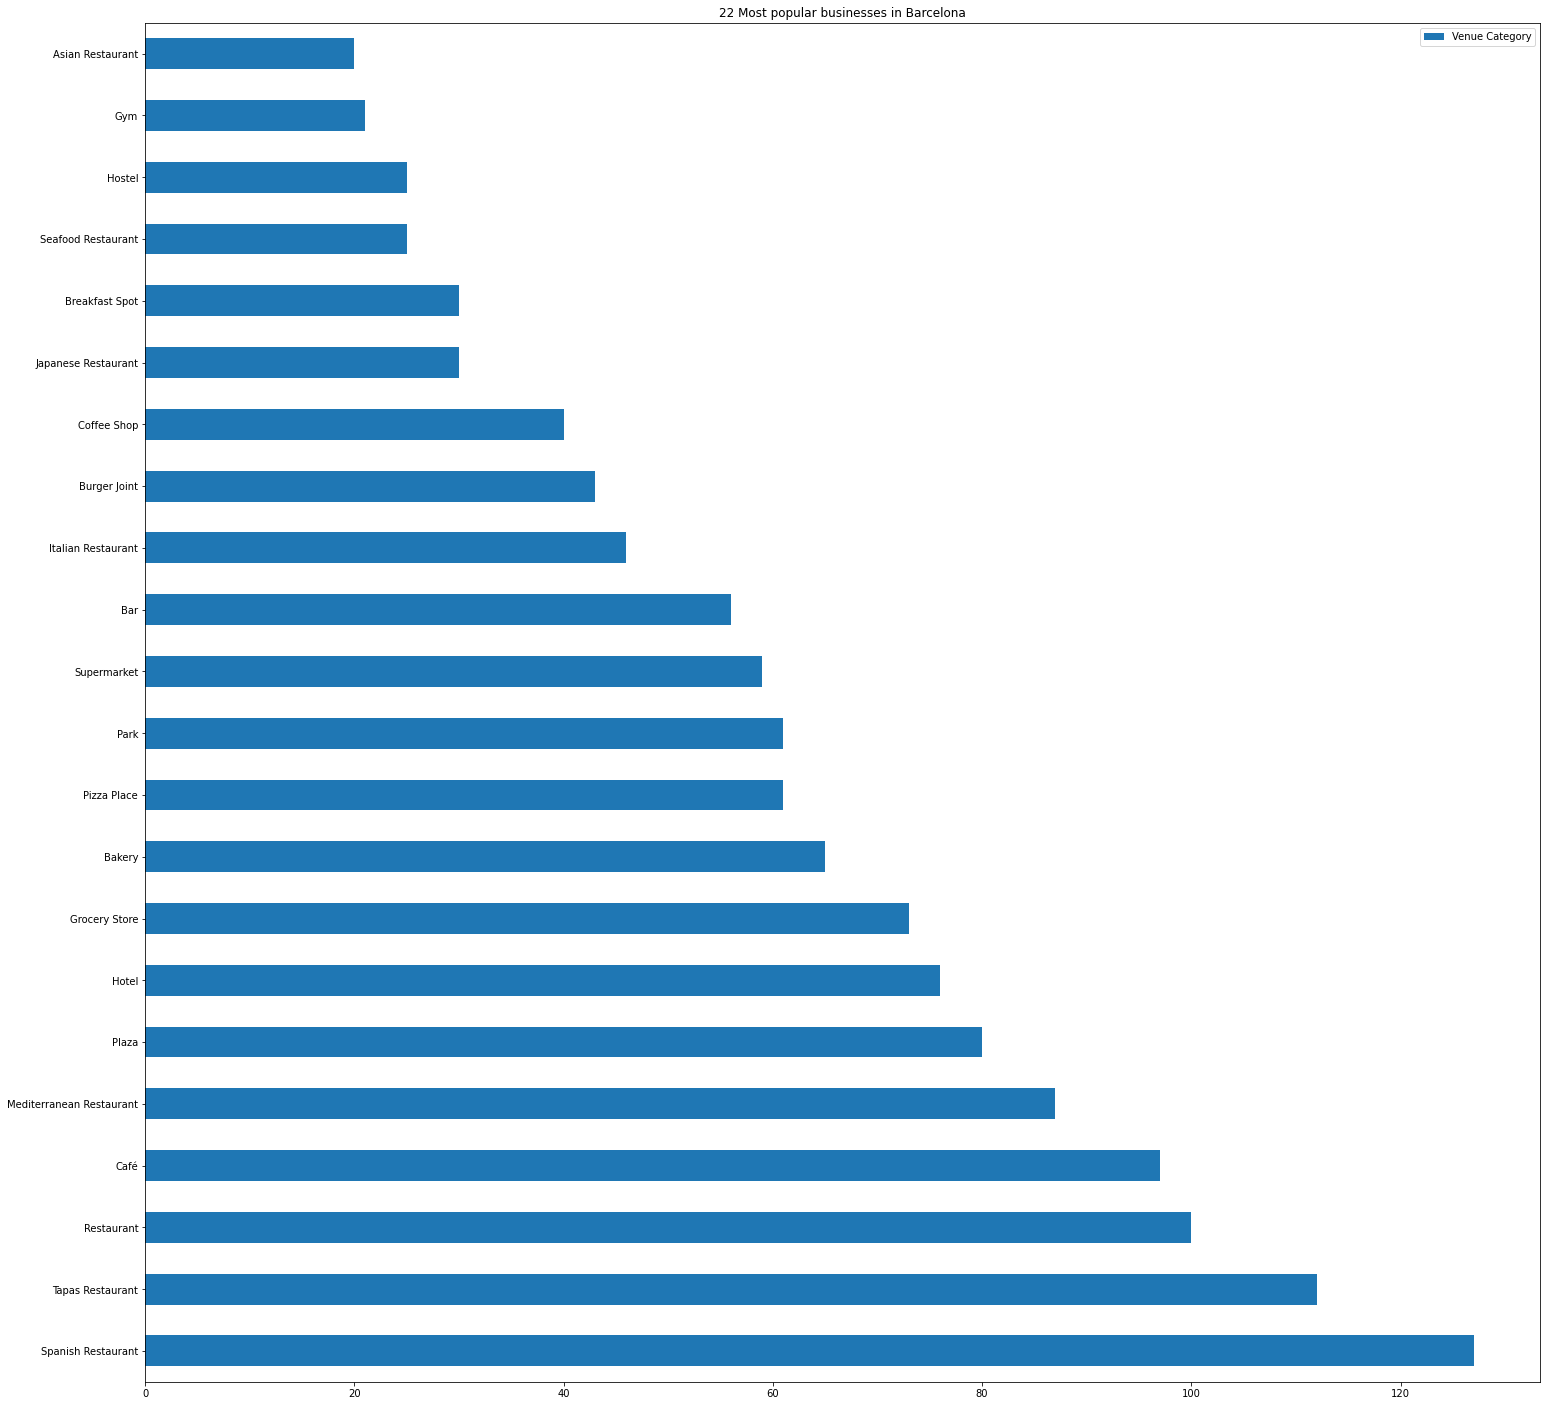

In [85]:
pddd.plot(kind='barh', figsize=(25, 25), title = '22 Most popular businesses in Barcelona')

In [26]:
# one hot encoding
bcn_onehot = pd.get_dummies(bcn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bcn_onehot['Neighborhood'] = bcn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bcn_onehot.columns[-1]] + list(bcn_onehot.columns[:-1])
bcn_onehot = bcn_onehot[fixed_columns]

bcn_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Basketball Stadium,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Track,Trail,Train Station,Tram Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Yoga Studio
0,"La Barceloneta, Barcelona",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"La Barceloneta, Barcelona",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
bcn_onehot.shape

(2224, 242)

In [28]:
bcn_grouped = bcn_onehot.groupby('Neighborhood').mean().reset_index()
bcn_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Basketball Stadium,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Toy / Game Store,Track,Trail,Train Station,Tram Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Can Baró,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [29]:
num_top_venues = 5

for hood in bcn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bcn_grouped[bcn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Can Baró----
                venue  freq
0  Spanish Restaurant  0.22
1       Grocery Store  0.17
2                Park  0.11
3         Pizza Place  0.11
4            Building  0.06


----Can Peguera----
                      venue  freq
0  Mediterranean Restaurant  0.08
1               Supermarket  0.06
2          Tapas Restaurant  0.06
3                       Bar  0.06
4        Spanish Restaurant  0.05


----Canyelles (neighbourhood)----
                venue  freq
0  Spanish Restaurant  0.14
1               Plaza  0.08
2    Tapas Restaurant  0.08
3                Park  0.05
4                 Bar  0.05


----Ciutat Meridiana----
                venue  freq
0        Burger Joint  0.07
1               Plaza  0.07
2          Restaurant  0.07
3       Grocery Store  0.07
4  Spanish Restaurant  0.07


----Dreta de l'Eixample----
                venue  freq
0                Café  0.08
1         Pizza Place  0.08
2  Italian Restaurant  0.05
3                Park  0.05
4        Burger Join

                venue  freq
0  Spanish Restaurant  0.17
1                Café  0.12
2              Bakery  0.12
3       Grocery Store  0.08
4               Plaza  0.04


----Sant Genís dels Agudells----
                venue  freq
0       Grocery Store  0.15
1  Spanish Restaurant  0.11
2                Park  0.07
3    Tapas Restaurant  0.07
4          Restaurant  0.04


----Sant Gervasi - Galvany----
                venue  freq
0  Spanish Restaurant  0.18
1               Plaza  0.09
2      Scenic Lookout  0.09
3  Chinese Restaurant  0.09
4                Café  0.09


----Sant Gervasi - la Bonanova----
              venue  freq
0        Restaurant  0.10
1             Plaza  0.10
2  Tapas Restaurant  0.10
3     Grocery Store  0.06
4               Bar  0.06


----Sant Pere, Santa Caterina i la Ribera----
                      venue  freq
0  Mediterranean Restaurant  0.09
1                      Café  0.07
2                Restaurant  0.07
3        Italian Restaurant  0.04
4                

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bcn_grouped['Neighborhood']

for ind in np.arange(bcn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bcn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Can Baró,Spanish Restaurant,Grocery Store,Pizza Place,Park,Sports Club,Restaurant,Building,Tapas Restaurant,Bar,Italian Restaurant
1,Can Peguera,Mediterranean Restaurant,Supermarket,Bar,Tapas Restaurant,Park,Spanish Restaurant,Café,Grocery Store,Asian Restaurant,Breakfast Spot
2,Canyelles (neighbourhood),Spanish Restaurant,Tapas Restaurant,Plaza,Bar,Grocery Store,Park,Café,Restaurant,Supermarket,Japanese Restaurant
3,Ciutat Meridiana,Burger Joint,Restaurant,Spanish Restaurant,Grocery Store,Plaza,Food Truck,Fried Chicken Joint,Tapas Restaurant,Seafood Restaurant,Snack Place
4,Dreta de l'Eixample,Pizza Place,Café,Burger Joint,Mediterranean Restaurant,Tapas Restaurant,Park,Supermarket,Italian Restaurant,Hotel,Spanish Restaurant


In [32]:
# set number of clusters
kclusters = 5
bcn_grouped_clustering = bcn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bcn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 0, 0, 2, 0, 2, 2, 0])

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bcn_merged = bcn

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bcn_merged = bcn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bcn_merged # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"La Barceloneta, Barcelona",41.377630,2.171450,0,Spanish Restaurant,Mediterranean Restaurant,Tapas Restaurant,Hotel,Cocktail Bar,Theater,Pizza Place,Plaza,Italian Restaurant,Bar
3,El Gòtic,41.389549,2.178998,0,Hotel,Chinese Restaurant,Café,Tapas Restaurant,Mediterranean Restaurant,Burger Joint,Breakfast Spot,Bookstore,Spa,Hostel
4,El Raval,41.390690,2.144940,0,Restaurant,Spanish Restaurant,Burger Joint,Japanese Restaurant,Mediterranean Restaurant,Coffee Shop,Italian Restaurant,Hotel,Wine Shop,Gym
5,"Sant Pere, Santa Caterina i la Ribera",41.385710,2.142540,0,Mediterranean Restaurant,Café,Restaurant,Spanish Restaurant,Paella Restaurant,Italian Restaurant,Bakery,Coffee Shop,Korean Restaurant,Hotel
8,L'Antiga Esquerra de l'Eixample,41.404080,2.176230,0,Coffee Shop,Hotel,Italian Restaurant,Bakery,Plaza,Restaurant,Spanish Restaurant,Burger Joint,Café,Mexican Restaurant
9,La Nova Esquerra de l'Eixample,41.375640,2.159230,0,Tapas Restaurant,Pizza Place,Bar,Restaurant,Café,Mediterranean Restaurant,Coffee Shop,Spanish Restaurant,Seafood Restaurant,Cocktail Bar
10,Dreta de l'Eixample,41.369860,2.136220,0,Pizza Place,Café,Burger Joint,Mediterranean Restaurant,Tapas Restaurant,Park,Supermarket,Italian Restaurant,Hotel,Spanish Restaurant
11,Fort Pienc,41.371310,2.146450,0,Spanish Restaurant,Plaza,Tapas Restaurant,Hotel,Café,Nightclub,Bakery,Track,Grocery Store,Burger Joint
12,Sagrada Família (Eixample),41.375220,2.145970,0,Tapas Restaurant,Restaurant,Hotel,Café,Bar,Mediterranean Restaurant,Pizza Place,Cafeteria,Scenic Lookout,Video Game Store
13,"Sant Antoni, Barcelona",41.360450,2.138470,0,Spanish Restaurant,Bakery,Café,Grocery Store,Latin American Restaurant,Transportation Service,Furniture / Home Store,Mediterranean Restaurant,Supermarket,Restaurant


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bcn_merged['Latitude'],bcn_merged['Longitude'], bcn_merged['Neighborhood'], bcn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 0, bcn_merged.columns[[4] + list(range(5,bcn_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Spanish Restaurant,Mediterranean Restaurant,Tapas Restaurant,Hotel,Cocktail Bar,Theater,Pizza Place,Plaza,Italian Restaurant,Bar
3,Hotel,Chinese Restaurant,Café,Tapas Restaurant,Mediterranean Restaurant,Burger Joint,Breakfast Spot,Bookstore,Spa,Hostel
4,Restaurant,Spanish Restaurant,Burger Joint,Japanese Restaurant,Mediterranean Restaurant,Coffee Shop,Italian Restaurant,Hotel,Wine Shop,Gym
5,Mediterranean Restaurant,Café,Restaurant,Spanish Restaurant,Paella Restaurant,Italian Restaurant,Bakery,Coffee Shop,Korean Restaurant,Hotel
8,Coffee Shop,Hotel,Italian Restaurant,Bakery,Plaza,Restaurant,Spanish Restaurant,Burger Joint,Café,Mexican Restaurant
9,Tapas Restaurant,Pizza Place,Bar,Restaurant,Café,Mediterranean Restaurant,Coffee Shop,Spanish Restaurant,Seafood Restaurant,Cocktail Bar
10,Pizza Place,Café,Burger Joint,Mediterranean Restaurant,Tapas Restaurant,Park,Supermarket,Italian Restaurant,Hotel,Spanish Restaurant
11,Spanish Restaurant,Plaza,Tapas Restaurant,Hotel,Café,Nightclub,Bakery,Track,Grocery Store,Burger Joint
12,Tapas Restaurant,Restaurant,Hotel,Café,Bar,Mediterranean Restaurant,Pizza Place,Cafeteria,Scenic Lookout,Video Game Store
13,Spanish Restaurant,Bakery,Café,Grocery Store,Latin American Restaurant,Transportation Service,Furniture / Home Store,Mediterranean Restaurant,Supermarket,Restaurant


In [36]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 1, bcn_merged.columns[[4] + list(range(5,bcn_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Plaza,Grocery Store,Train Station,Yoga Studio,Falafel Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Farm


In [37]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 2, bcn_merged.columns[[4] + list(range(5,bcn_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Spanish Restaurant,Grocery Store,Plaza,Café,Scenic Lookout,Chinese Restaurant,Pool,Breakfast Spot,Tapas Restaurant,Park
37,Plaza,Coffee Shop,Supermarket,Metro Station,Mediterranean Restaurant,Bar,Grocery Store,Food Court,Deli / Bodega,Cultural Center
41,Plaza,Breakfast Spot,Park,Restaurant,Chinese Restaurant,Grocery Store,Farm,Metro Station,Mediterranean Restaurant,Outdoor Sculpture
43,Mediterranean Restaurant,Spanish Restaurant,Metro Station,Grocery Store,Athletics & Sports,Bakery,Café,Park,Tapas Restaurant,Farmers Market
44,Plaza,Restaurant,Park,Mediterranean Restaurant,Spanish Restaurant,Café,Chinese Restaurant,Outdoor Sculpture,Tennis Court,Metro Station
45,Park,Grocery Store,Plaza,Restaurant,Supermarket,Tapas Restaurant,Spanish Restaurant,German Restaurant,Bar,Food & Drink Shop
48,Grocery Store,Plaza,Seafood Restaurant,Spanish Restaurant,Comedy Club,Bar,Park,Restaurant,Diner,Soccer Field
50,Spanish Restaurant,Grocery Store,Pizza Place,Park,Sports Club,Restaurant,Building,Tapas Restaurant,Bar,Italian Restaurant
51,Plaza,Gym Pool,Castle,Metro Station,Baby Store,Diner,Grocery Store,Gym,Falafel Restaurant,Music Venue
53,Spanish Restaurant,Plaza,Pharmacy,Metro Station,Tapas Restaurant,Park,Grocery Store,Breakfast Spot,Dance Studio,Event Space


In [38]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 3, bcn_merged.columns[[4] + list(range(5,bcn_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Bar,Pharmacy,Smoke Shop,Park,Yoga Studio,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market


In [39]:
bcn_merged.loc[bcn_merged['Cluster Labels'] == 4, bcn_merged.columns[[4] + list(range(5,bcn_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Spanish Restaurant,Art Gallery,Optical Shop,Scenic Lookout,Yoga Studio,Empanada Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


***CLUSTER ACCORDING TO GYM PRESENCE**

In [40]:
bcn_gym = bcn_grouped[["Neighborhood","Gym"]]
bcn_gym

,Neighborhood,Gym
0,Can Baró,0.000000
1,Can Peguera,0.016129
2,Canyelles (neighbourhood),0.000000
3,Ciutat Meridiana,0.035714
4,Dreta de l'Eixample,0.000000
5,El Baix Guinardó,0.000000
6,El Camp d'en Grassot i Gràcia Nova,0.000000
7,El Carmel,0.090909
8,El Coll,0.032258
9,El Guinardó,0.000000


In [41]:
# set number of clusters
kclusters = 3

bcn_gym_clustering = bcn_gym.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bcn_gym_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 1, 0, 1, 0, 0, 0, 2, 1, 0])

In [42]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
bcn_gym_merged = bcn_gym.copy()

# add clustering labels
bcn_gym_merged["Cluster Labels"] = kmeans.labels_

bcn_gym_merged.rename(columns={"Neighborhood": "Neighborhood"}, inplace=True)
bcn_gym_merged.head()

,Neighborhood,Gym,Cluster Labels
0,Can Baró,0.000000,0
1,Can Peguera,0.016129,1
2,Canyelles (neighbourhood),0.000000,0
3,Ciutat Meridiana,0.035714,1
4,Dreta de l'Eixample,0.000000,0


In [43]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bcn_gym_merged = bcn_gym_merged.join(bcn.set_index("Neighborhood"), on="Neighborhood")

print(bcn_gym_merged.shape)
bcn_gym_merged.head() # check the last columns!

(58, 5)


,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
0,Can Baró,0.000000,0,41.44353,2.18164
1,Can Peguera,0.016129,1,41.43139,2.18934
2,Canyelles (neighbourhood),0.000000,0,41.43765,2.18962
3,Ciutat Meridiana,0.035714,1,41.42450,2.19045
4,Dreta de l'Eixample,0.000000,0,41.36986,2.13622


In [44]:
print(bcn_gym_merged.shape)
bcn_gym_merged.sort_values(["Cluster Labels"], inplace=True)

(58, 5)


In [45]:
# create map
map_clustersg = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bcn_gym_merged['Latitude'],bcn_gym_merged['Longitude'], bcn_gym_merged['Neighborhood'], bcn_gym_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustersg)
       
map_clustersg

In [49]:
bcn_gym_merged.loc[bcn_gym_merged['Cluster Labels'] == 0]

,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
0,Can Baró,0.000000,0,41.443530,2.181640
56,Vilapicina i la Torre Llobeta,0.000000,0,41.423320,2.205130
29,La Prosperitat,0.000000,0,41.409120,2.192080
30,La Salut,0.000000,0,41.423070,2.144820
31,La Teixonera,0.000000,0,41.430030,2.169380
32,La Trinitat Nova,0.000000,0,41.402360,2.190330
33,La Vall d'Hebron,0.000000,0,41.448040,2.199630
34,Les Corts (neighbourhood),0.000000,0,41.413059,2.104603
35,"Les Roquetes, Barcelona",0.010638,0,41.410680,2.180630
36,Les Tres Torres,0.000000,0,41.423520,2.151740


In [50]:
bcn_gym_merged.loc[bcn_gym_merged['Cluster Labels'] == 1]

,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
1,Can Peguera,0.016129,1,41.431390,2.189340
23,La Font de la Guatlla,0.023256,1,41.375610,2.127300
3,Ciutat Meridiana,0.035714,1,41.424500,2.190450
49,"Sarrià, Barcelona",0.020000,1,41.410220,2.168793
10,El Gòtic,0.023810,1,41.389549,2.178998
46,"Sant Pere, Santa Caterina i la Ribera",0.037037,1,41.385710,2.142540
45,Sant Gervasi - la Bonanova,0.032258,1,41.421260,2.173890
8,El Coll,0.032258,1,41.432000,2.147480
12,El Putget i Farró,0.037037,1,41.413240,2.144550
39,Pedralbes,0.017857,1,41.408590,2.163820


In [51]:
bcn_gym_merged.loc[bcn_gym_merged['Cluster Labels'] == 2]

,Neighborhood,Gym,Cluster Labels,Latitude,Longitude
7,El Carmel,0.090909,2,41.44787,2.17507
